https://towardsdatascience.com/customize-colormaps-with-matplotlib-df5b37d14662

[(0.16470588235294117, 0.13333333333333333, 0.12156862745098039), (0.3215686274509804, 0.23137254901960785, 0.20784313725490197), (0.4392156862745098, 0.27058823529411763, 0.1450980392156863), (0.7333333333333333, 0.6431372549019608, 0.5176470588235295)]


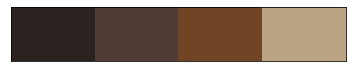

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Normalize the RGB colors (RGB color tuples in comments):
colors = [(42/255, 34/255, 31/255),    # (42, 34, 31)
          (82/255, 59/255, 53/255),    # (82, 59, 53)
          (112/255, 69/255, 37/255),   # (112, 69, 37)
          (187/255, 164/255, 132/255)  # (187, 164, 132)
         ]
print(colors)
# Create a ListedColormap (discrete colors):
custom_cmap_discrete = ListedColormap(colors)

# Display a colorbar with the custom colormap:
fig, ax = plt.subplots(figsize=(6, 1))
plt.imshow([[i for i in range(len(colors))]], 
           cmap=custom_cmap_discrete, 
           aspect='auto')
plt.xticks([]), plt.yticks([]);  # Turn off tickmarks
# plt.show()

In [3]:
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])

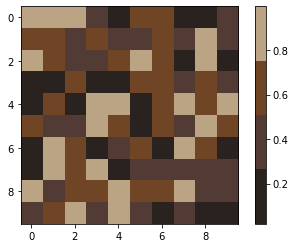

In [4]:
# Create randomized data with NumPy:
data = np.random.rand(10, 10)

# Plot using the custom colormap:
plt.imshow(data, cmap=custom_cmap_discrete)
plt.colorbar();
# plt.show()

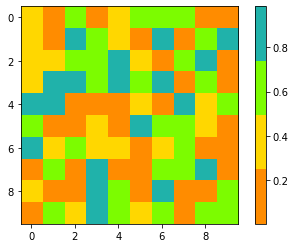

In [5]:
# Create randomized data with NumPy:
data = np.random.rand(10, 10)

# Plot using the custom colormap:
plt.imshow(data, cmap=cmap)
plt.colorbar();
# plt.show()

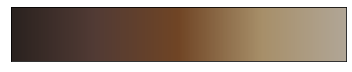

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Normalize RGB colors (RGB color tuples in comments):
colors = [(42/255, 34/255, 31/255),     # (42, 34, 31)
          (82/255, 59/255, 53/255),     # (82, 59, 53)
          (112/255, 69/255, 37/255),    # (112, 69, 37)
          (167/255, 143/255, 105/255),  # (187, 164, 132)
          (177/255, 166/255, 150/255)   # (177, 166, 150)
         ]

# Create a list of positions for each color in the colormap:
positions = [0.0, 0.25, 0.5, 0.75, 1.0]

# Create a LinearSegmentedColormap (continuous colors):
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', 
                                                list(zip(positions, colors)))

# Display a colorbar with the custom colormap:
fig, ax = plt.subplots(figsize=(6, 1))
plt.imshow([[i for i in range(256)]], 
           cmap=custom_cmap, 
           aspect='auto', 
           vmin=0, 
           vmax=255)
plt.xticks([]), plt.yticks([]);
# plt.show()

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# Load the CSV file into a pandas DataFrame:
df = pd.read_csv('https://bit.ly/3t3Vbx7')

# Create a GeoDataFrame with Point geometries:
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df['longitude'], 
                                                   df['latitude']), 
                       crs='EPSG:4326')

gdf.head(3)

C:\Users\biegertm\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\biegertm\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


,latin,common,latitude,longitude,geometry
0,Quercus palustris,pin oak,40.794111,-73.818679,POINT (-73.81868 40.79411)
1,Quercus palustris,pin oak,40.740687,-73.808260,POINT (-73.80826 40.74069)
2,Quercus palustris,pin oak,40.532113,-74.156181,POINT (-74.15618 40.53211)


C:\Users\biegertm\AppData\Local\Temp/ipykernel_18648/973990259.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  path_to_data = gpd.datasets.get_path("nybb")


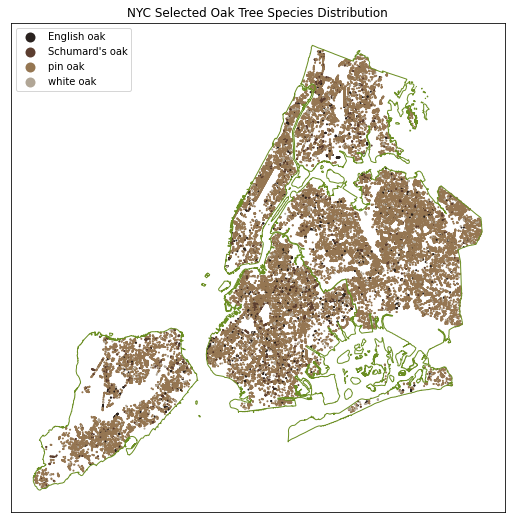

In [8]:
# Plot tree locations along with NYC borough boundaries:
path_to_data = gpd.datasets.get_path("nybb")
gdf_nyc = gpd.read_file(path_to_data)

# Extract the boundaries GeoSeries:
borough_boundaries = gdf_nyc.boundary

# Plot the boundaries with no fill:
ax = borough_boundaries.plot(figsize=(9, 9), 
                             linewidth=1, 
                             edgecolor='olivedrab')

# Convert the tree gdf crs to the boroughs crs:
gdf = gdf.to_crs(gdf_nyc.crs)

# Plot the tree locations in the same figure:
gdf.plot(column='common', 
         ax=ax, 
         legend=True, 
         markersize=1, 
         cmap=custom_cmap)

# Customize the plot:
plt.title('NYC Selected Oak Tree Species Distribution')
plt.xticks([]), plt.yticks([]);

# Show the plot
# plt.show()

In [ ]:
/*
!conda install -c conda-forge geoplot

!pip install geoplot

*/

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import geoplot as gplt
import geoplot.crs as gcrs

# Reverse colormap so darkest = most dense for KDE plot:
colors = [(177/255, 166/255, 150/255),  # (177, 166, 150)
          (167/255, 143/255, 105/255),  # (187, 164, 132)
          (112/255, 69/255, 37/255),  # (112, 69, 37)
          (82/255, 59/255, 53/255),   # (82, 59, 53)
          (42/255, 34/255, 31/255)  # (42, 34, 31)
         ]

# Create a list of positions for each color in the colormap
positions = [0.0, 0.25, 0.50, 0.75, 1.0]

# Create a LinearSegmentedColormap
custom_cmap_r = LinearSegmentedColormap.from_list('custom_colormap', 
                                                  list(zip(positions, colors)))

# Get the borough boundaries:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
boroughs = boroughs.to_crs('EPSG:4326')

# Reset the gdf's crs:
gdf = gdf.to_crs('EPSG:4326')

# Plot the KDE map:
ax = gplt.kdeplot(gdf, cmap=custom_cmap_r, fill=True, clip=boroughs)
gplt.polyplot(boroughs, zorder=1, ax=ax);